# **Import Libraries**

In [123]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import cross_validate
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from yellowbrick.classifier import ROCAUC

# **Load Data**

Load the diabetes dataset and dispalying the dataframe

In [124]:
df = pd.read_csv('stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [125]:
#checking dataset summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# **visualisation**

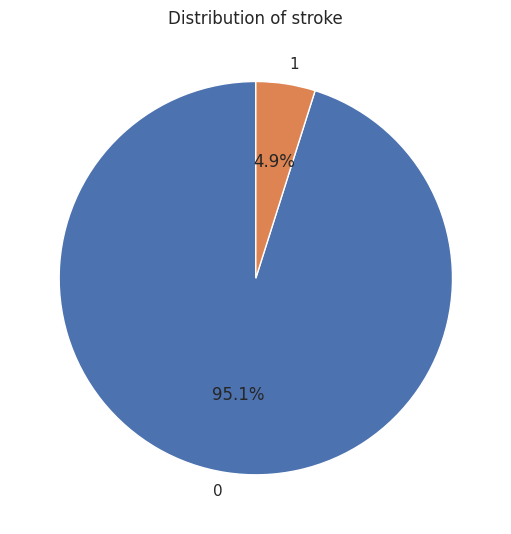

In [126]:

# plotting distribution for individuals having stroke and no stroke
plt.pie(df['stroke'].value_counts(), labels=(df['stroke'].value_counts()).index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of stroke')


# Show the plot
plt.tight_layout()
plt.show()

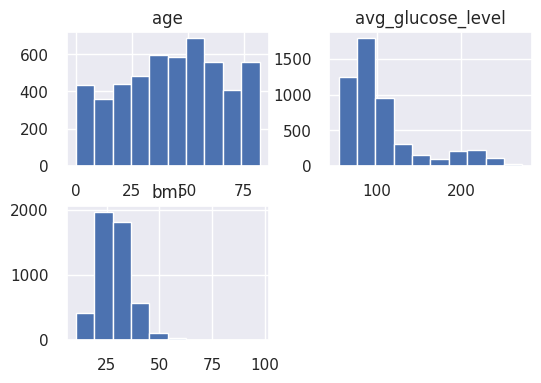

In [127]:
#data distribution for contionous variable in dataset

columns_to_plot = ['age', 'avg_glucose_level', 'bmi']
df[columns_to_plot].hist(figsize=(6, 4))
plt.show()


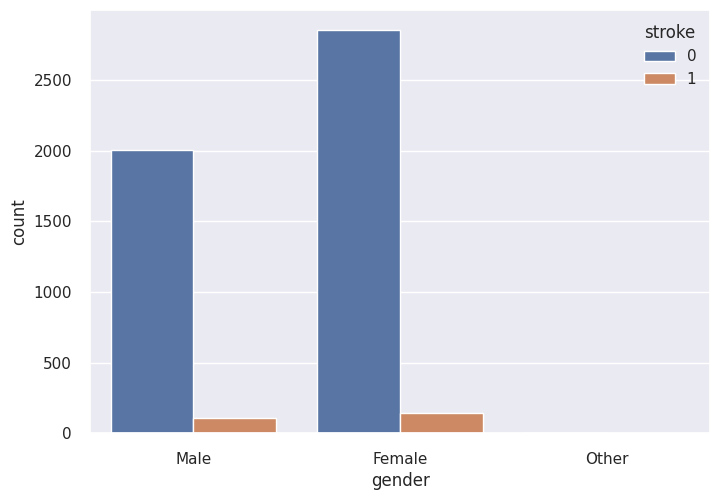

In [128]:
#Distribution of gender
gender = sns.countplot(x="gender", hue = "stroke" ,data=df, )

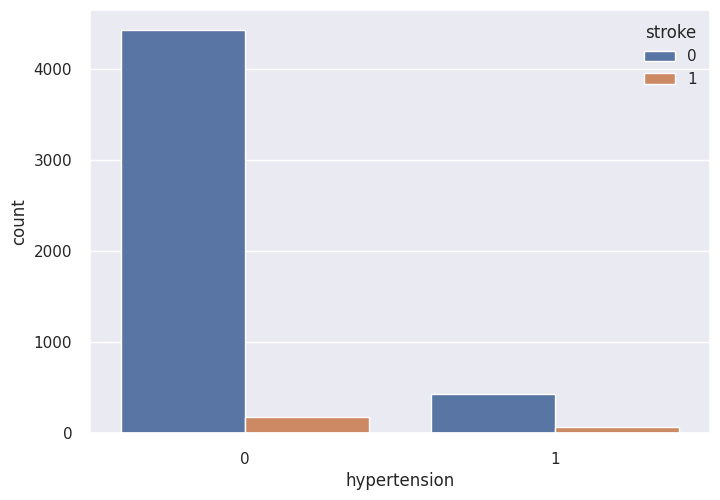

In [129]:
#Distribution of hypertension
hypertension = sns.countplot(x="hypertension", hue = "stroke" ,data=df, )

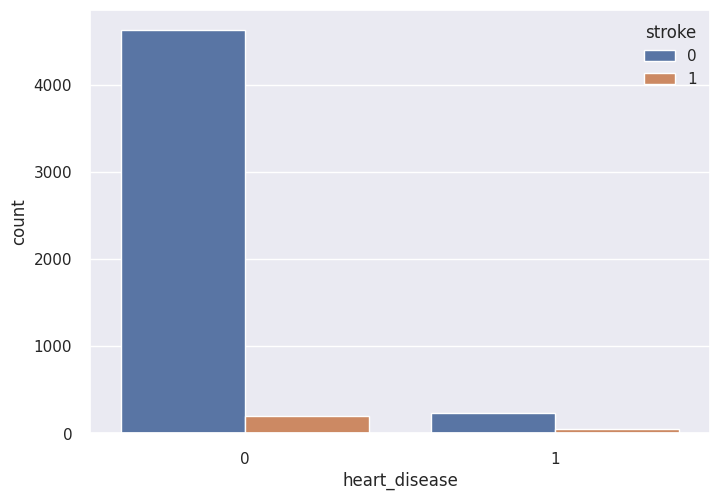

In [130]:
#Distribution of heart disease
heart_disease = sns.countplot(x="heart_disease", hue = "stroke" ,data=df, )

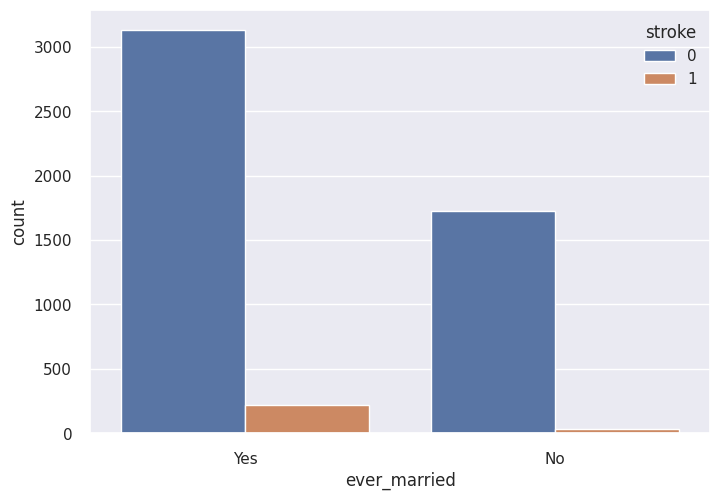

In [131]:
#Distribution of Marital status
ever_married = sns.countplot(x="ever_married", hue = "stroke" ,data=df, )

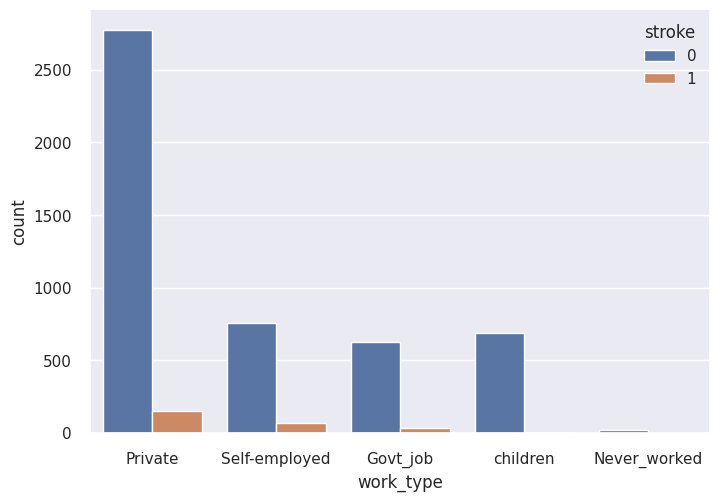

In [132]:
#Distribution of worktype
work_type = sns.countplot(x="work_type", hue = "stroke" ,data=df, )

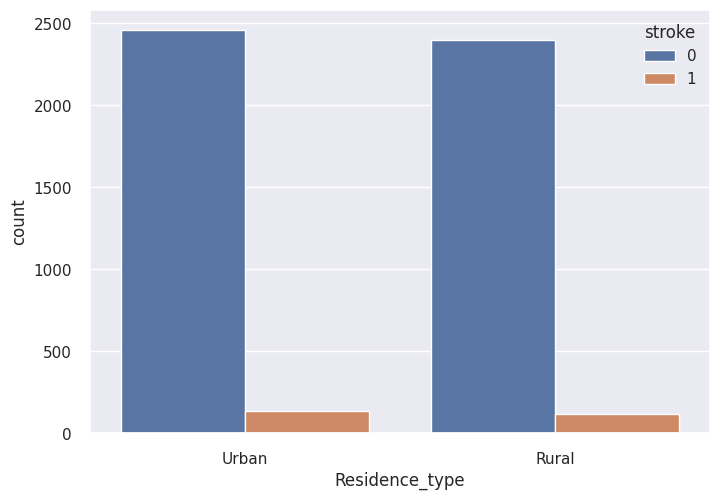

In [133]:
#Distribution of residence type
rsdnt = sns.countplot(x="Residence_type", hue = "stroke" ,data=df, )

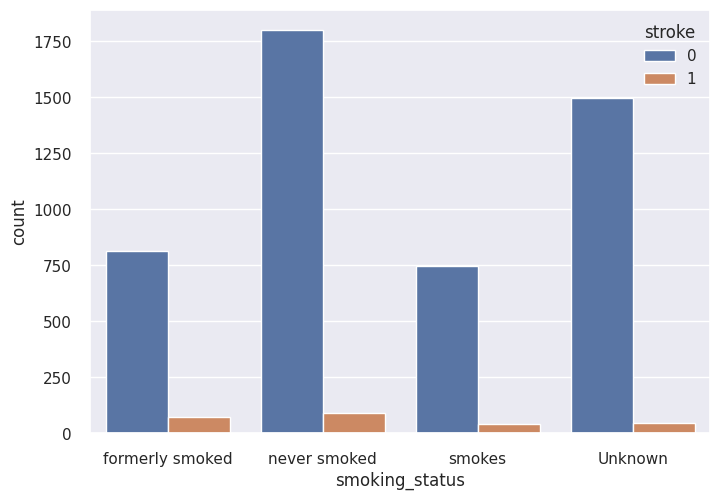

In [134]:
#Distribution of smoking status
smoking_status = sns.countplot(x="smoking_status", hue = "stroke" ,data=df, )

# **Preprocessing**

In [135]:
#dropping the column 'id' as it is not required
df.drop(['id'],axis=1,inplace = True)

In [136]:
#check any missing values in the dataset
df.eq(0)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,True,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,True,False,False,False,False,False,False,True
5106,False,False,True,True,False,False,False,False,False,False,True
5107,False,False,True,True,False,False,False,False,False,False,True
5108,False,False,True,True,False,False,False,False,False,False,True


True shows that there are missing values

In [137]:
#descriptive statistics
df.describe(include = "all")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [138]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [139]:
df.dropna(inplace=True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [140]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [141]:
#checking for duplicate values
df.duplicated().sum()

0

In [142]:
#descriptive statistics
df.describe(include = "all")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909,4909.000000,4909.000000,4909.000000,4909,4909,4909,4909.000000,4909.000000,4909,4909.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2897,NaN,NaN,NaN,3204,2811,2490,NaN,NaN,1852,NaN
mean,NaN,42.865374,0.091872,0.049501,NaN,NaN,NaN,105.305150,28.893237,NaN,0.042575
std,NaN,22.555115,0.288875,0.216934,NaN,NaN,NaN,44.424341,7.854067,NaN,0.201917
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.070000,23.500000,NaN,0.000000
50%,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.100000,NaN,0.000000
75%,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.570000,33.100000,NaN,0.000000


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


We have removed the missing values in the dataset now


# **EDA**

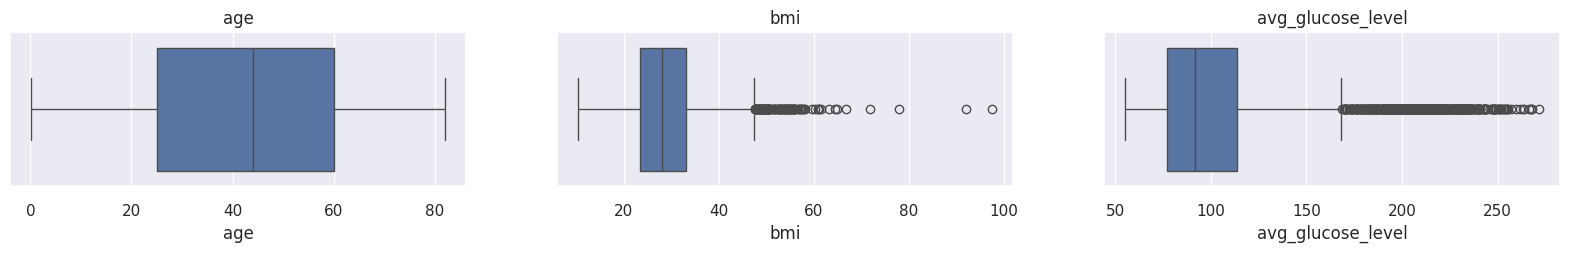

In [144]:
#creating boxplot for numerical datas to check outliers
num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(20, 2))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]])
    plt.title(num_cols[i])
plt.show()

In [145]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

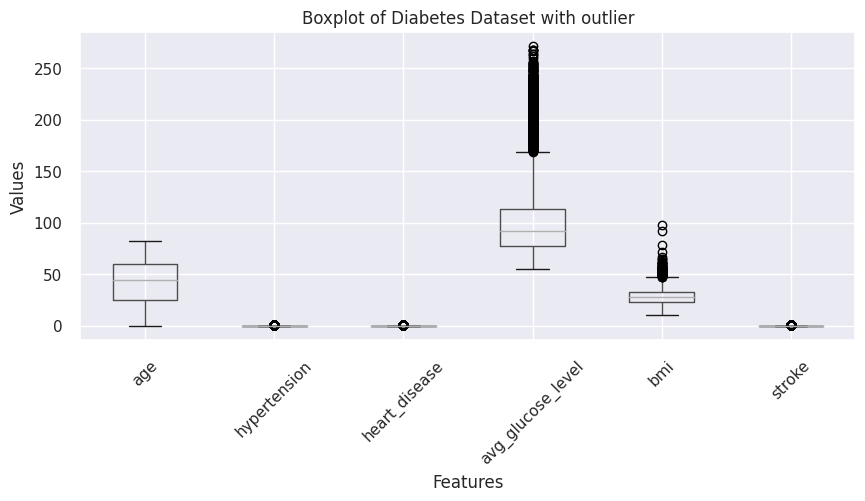

In [146]:
#plot boxplot for dataset before removing the outlier
plt.figure(figsize=(10, 4))
df.boxplot()
plt.title('Boxplot of Diabetes Dataset with outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [147]:
#removing outliers in the dataset
def outliers(dataframe,column):
    q1 = dataframe[column].quantile(.25)
    q3= dataframe[column].quantile(.75)
    IQR = q3-q1

    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)

    ls = dataframe.index[(dataframe[column] <lower_bound) | (dataframe[column] > upper_bound)]
    return ls

In [148]:
index_list = []

for col in num_cols:
    index_list.extend(outliers(df,col))

index_list = sorted(set(index_list))

In [149]:
before_remove = df.shape

df_cleaned = df.drop(index_list)

after_remove = df_cleaned.shape

print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (4909, 11)
Shape of data after remove : (4260, 11)


In [150]:
df_cleaned

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Now the dataset is cleaned without any missing values

In [151]:
total_removed_outliers = before_remove[0] - after_remove[0]
print(f"Total removed outliers : {total_removed_outliers}")

Total removed outliers : 649


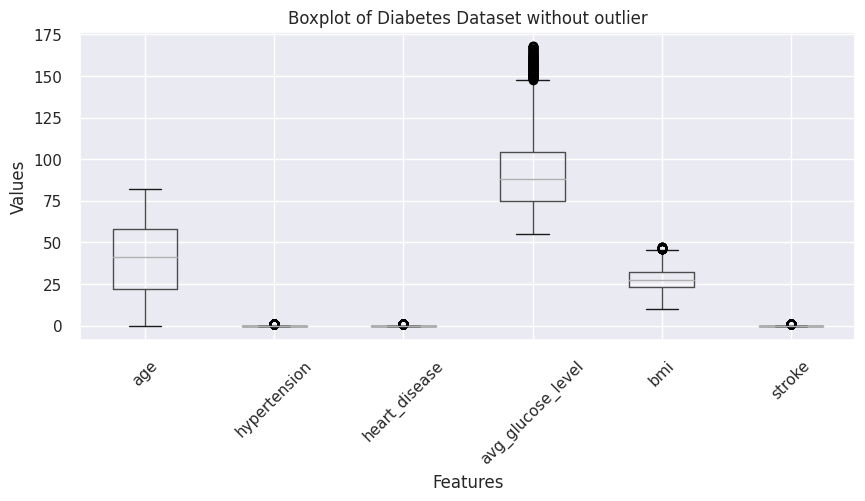

In [152]:
#plot boxplot for dataset after removing the outlier
plt.figure(figsize=(10, 4))
df_cleaned.boxplot()
plt.title('Boxplot of Diabetes Dataset without outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [153]:
df_cleaned.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000
mean,40.593070,0.068545,0.036385,91.515812,27.813028,0.031925
std,22.443644,0.252708,0.187268,22.715044,6.721922,0.175821
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,22.000000,0.000000,0.000000,75.060000,23.000000,0.000000
50%,41.000000,0.000000,0.000000,88.055000,27.400000,0.000000
75%,58.000000,0.000000,0.000000,104.055000,32.100000,0.000000
max,82.000000,1.000000,1.000000,168.150000,47.500000,1.000000


After removing all the outiers from every features the dataset is ready for Modelling


# **Building Machine Learning Models**

From the visualization, it can be seen that datas are imbalanced We need to balance the data for prediction

In [154]:
# visualize imbalanced data
import plotly.express as px
stroke = dict(df_cleaned['stroke'].value_counts())
fig = px.pie(names = ['False','True'],values = stroke.values(),title = 'Stroke Occurance')
fig.update_traces(textposition='inside', textinfo='percent+label')

In [155]:
df_0 = df_cleaned[df_cleaned.iloc[:,-1]==0]
df_1 = df_cleaned[df_cleaned.iloc[:,-1]==1]

df_cleaned['stroke'].value_counts()

stroke
0    4124
1     136
Name: count, dtype: int64

In [156]:
from sklearn.utils import resample

df_1 = resample(df_1,replace=True , n_samples=df_0.shape[0] , random_state=123 )

In [157]:
#concat upsampled data
df_cleaned = np.concatenate((df_0,df_1))

In [158]:
#create the balanced dataframe
df_balanced = pd.DataFrame(df_cleaned)
df_balanced.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke']

In [159]:
# visualize balanced data
stroke = dict(df_balanced['stroke'].value_counts())
fig = px.pie(names = ['False','True'],values = stroke.values(),title = 'Stroke Occurance')
fig.update_traces(textposition='inside', textinfo='percent+label')

Now the dataset is balanced

We have gender, ever_married, work_type, Residence_type, smoking_status as the categorical variables.
We need to encode categorical variables to numerical variables

In [160]:
df_balanced = pd.get_dummies(data =df_balanced , columns =  ['gender','ever_married','work_type','Residence_type','smoking_status'] ,drop_first=True )

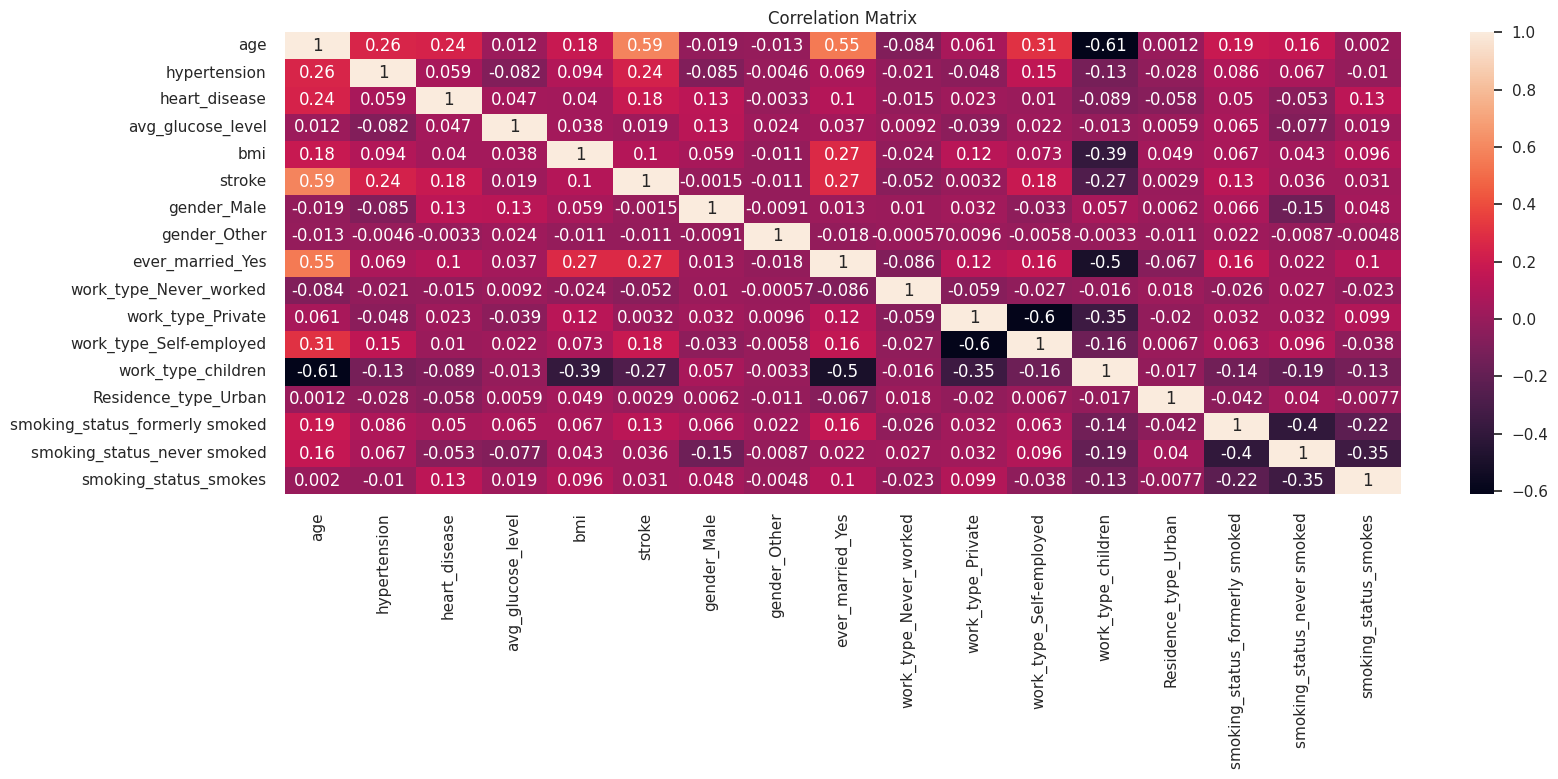

In [161]:
# Calculate correlation matrix
correlation_matrix = df_balanced.corr()

# Create a heatmap plot
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

creating independent variable(X) and dependent or target variable(y) from the cleaned dataset

In [162]:
X = df_balanced.drop('stroke', axis = 1)
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,True,False,False,False,False,False,True,False,False,False,False
1,58.0,1,0,87.96,39.2,True,False,True,False,True,False,False,True,False,True,False
2,8.0,0,0,110.89,17.6,False,False,False,False,True,False,False,True,False,False,False
3,70.0,0,0,69.04,35.9,False,False,True,False,True,False,False,False,True,False,False
4,14.0,0,0,161.28,19.1,True,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,79.0,0,0,72.73,28.4,True,False,True,False,True,False,False,False,False,True,False
8244,48.0,0,0,84.2,29.7,True,False,False,False,False,False,False,True,False,True,False
8245,80.0,1,0,66.03,35.4,False,False,False,False,True,False,False,True,False,True,False
8246,77.0,0,0,90.0,32.0,False,False,True,False,False,True,False,False,False,True,False


In [163]:
y = df_balanced['stroke']
y = pd.to_numeric( df_balanced['stroke'])
y

0       0
1       0
2       0
3       0
4       0
       ..
8243    1
8244    1
8245    1
8246    1
8247    1
Name: stroke, Length: 8248, dtype: int64

In [164]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2)

In [165]:
y_train

2399    0
3699    0
4131    1
4942    1
4656    1
       ..
7562    1
1366    0
3657    0
5269    1
4185    1
Name: stroke, Length: 6598, dtype: int64

In [166]:
#scaling the data
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [167]:
#checking the shape of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (8248, 16)
Shape of y: (8248,)


In [168]:
#splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
#checking the shape of train X and train y data
print("Training set shape of X:", X_train.shape)
print("Training set shape of y:", y_train.shape)

Training set shape of X: (6598, 16)
Training set shape of y: (6598,)


In [170]:
#checking the shape of test X and test y data
print("Test set shape of X:", X_test.shape)
print("Test set shape of y:", y_test.shape)

Test set shape of X: (1650, 16)
Test set shape of y: (1650,)


In [171]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [172]:
X_test

array([[ 0.55922045,  2.41898857, -0.30720869, ...,  1.96251639,
        -0.79115365, -0.4372525 ],
       [ 0.99657253, -0.41339592, -0.30720869, ..., -0.50954988,
        -0.79115365, -0.4372525 ],
       [ 0.34054441, -0.41339592, -0.30720869, ..., -0.50954988,
        -0.79115365, -0.4372525 ],
       ...,
       [ 1.12777815, -0.41339592, -0.30720869, ..., -0.50954988,
         1.26397698, -0.4372525 ],
       [-0.22801329, -0.41339592, -0.30720869, ..., -0.50954988,
        -0.79115365,  2.2870081 ],
       [ 0.42801483, -0.41339592, -0.30720869, ..., -0.50954988,
         1.26397698, -0.4372525 ]])

We will employing six machine learning models - Support Vector Machine (SVM), Random Forests, Logistic Regression, Decision Tree, K-Nearest Neighbors (KNN), and Naïve Bayes - we compare their effectiveness in stroke prediction. We consider metrics like precision, recall, and F1-score to select the best-performing model.

In [173]:
y_train

248     0
6128    1
4927    1
296     0
7016    1
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: stroke, Length: 6598, dtype: int64

**Logistic Regression**

In [174]:
# fitting data to model
log_Reg = LogisticRegression()
log_Reg.fit(X_train, y_train)

LogisticRegression()

In [175]:
# model predictions

log_y_pred = log_Reg.predict(X_test)

In [176]:
# accuracy score

print("Logistic Train Accuracy: ", accuracy_score(y_train, log_Reg.predict(X_train)))

log_Reg_acc = accuracy_score(y_test, log_y_pred)
print("Logistic Test Accuracy: ", log_Reg_acc)

Logistic Train Accuracy:  0.7741739921188239
Logistic Test Accuracy:  0.7642424242424243


In [177]:
# classification report
report = classification_report(y_test, log_y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       819
           1       0.75      0.79      0.77       831

    accuracy                           0.76      1650
   macro avg       0.77      0.76      0.76      1650
weighted avg       0.76      0.76      0.76      1650



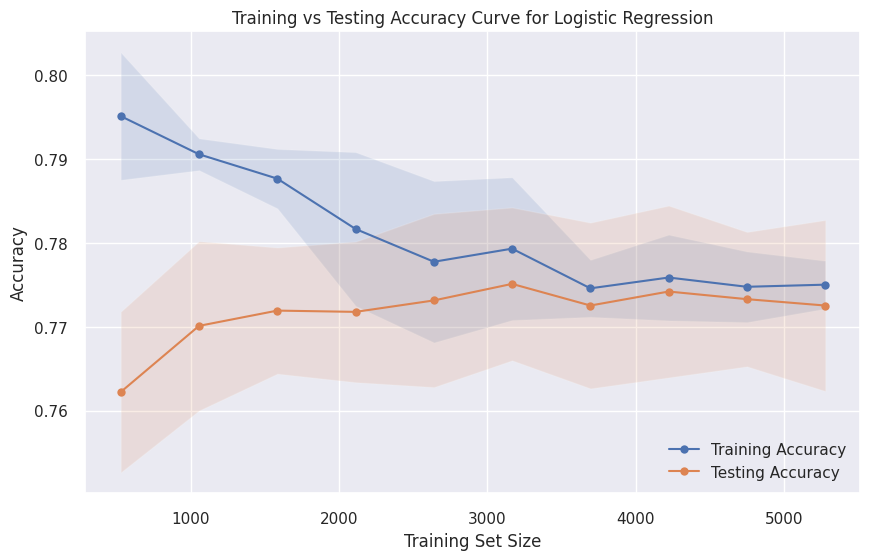

In [178]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(log_Reg, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Training vs Testing Accuracy Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

[[602 217]
 [172 659]]


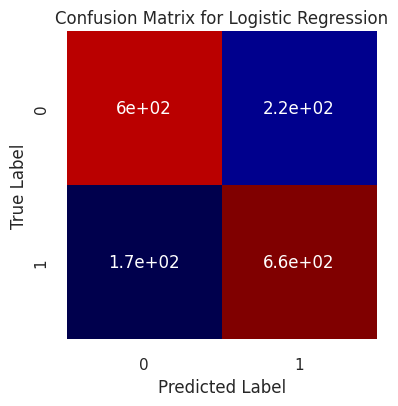

In [179]:
log_Reg_acc = accuracy_score(y_test, log_y_pred)
log_Reg_roc = roc_auc_score(y_test, log_y_pred)
log_Reg_prec = precision_score(y_test, log_y_pred)
log_Reg_rec = recall_score(y_test, log_y_pred)
log_Reg_f1 = f1_score(y_test, log_y_pred)

# confusion matrix

confusion_log = confusion_matrix(y_test, log_y_pred)
print(confusion_log)

# Plot the confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_log, annot=True, cmap='seismic', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [180]:
tn, fp, fn, tp = confusion_matrix(y_test, log_y_pred).ravel()
#cm = confusion_matrix(y_test, log_y_pred)
#Calculate sensitivity
log_Reg_sensitivity = tp / (tp + fn)

#Calculate specificity
log_Reg_specificity = tn / (tn + fp)

print("Sensitivity:", log_Reg_sensitivity)
print("Specificity:", log_Reg_specificity)

#print("Confusion Matrix:\n", cm)

Sensitivity: 0.7930204572803851
Specificity: 0.7350427350427351


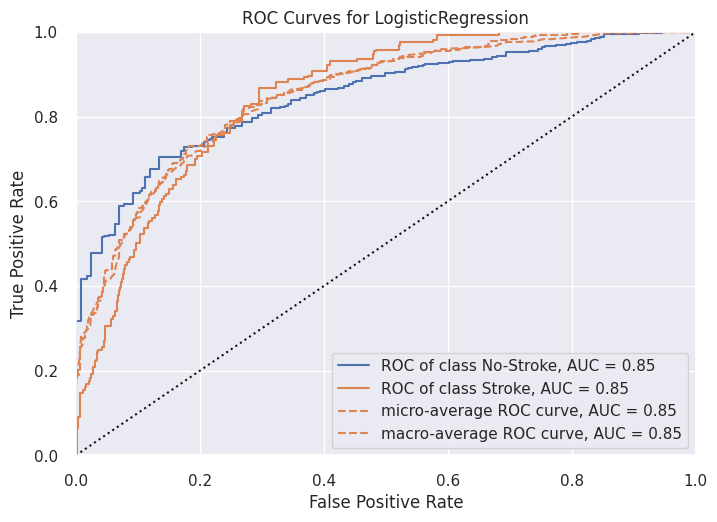

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [181]:
display_ROCAUC = ROCAUC(log_Reg, classes=["No-Stroke", "Stroke"])

display_ROCAUC.fit(X_train, y_train)
display_ROCAUC.score(X_test, y_test)
display_ROCAUC.show()

**K Neighbors Classifier (KNN)**

In [182]:
# fitting data to model

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# model predictions

knn_y_pred = knn.predict(X_test)

In [183]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("KNN Train Accuracy: ", accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn_y_pred)
print("KNN Test Accuracy: ", knn_acc)

KNN Train Accuracy:  0.9690815398605638
KNN Test Accuracy:  0.9503030303030303


In [184]:
# classification report

print(classification_report(y_test, knn_y_pred, zero_division= 0 ))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       819
           1       0.91      1.00      0.95       831

    accuracy                           0.95      1650
   macro avg       0.96      0.95      0.95      1650
weighted avg       0.95      0.95      0.95      1650



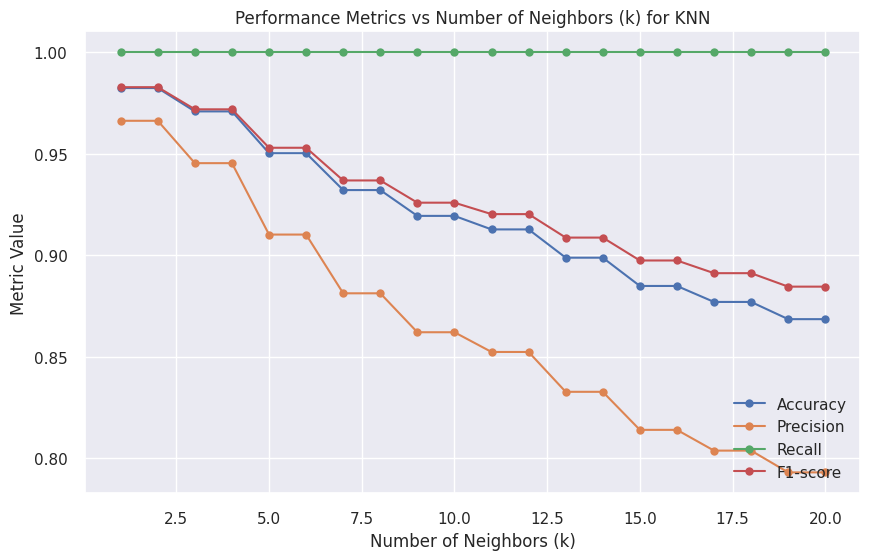

In [185]:
# Assuming you have already defined and preprocessed your data (X_train, y_train, X_test, y_test)

# Vary the number of neighbors (k) from 1 to a certain maximum value
k_values = range(1, 21)  # Adjust the range as needed
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

# Plot the performance metrics for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, label='Accuracy', marker='o')
plt.plot(k_values, precision_values, label='Precision', marker='o')
plt.plot(k_values, recall_values, label='Recall', marker='o')
plt.plot(k_values, f1_values, label='F1-score', marker='o')

plt.title('Performance Metrics vs Number of Neighbors (k) for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Metric Value')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

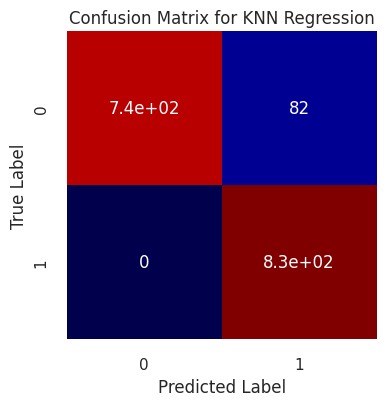

In [186]:
knn_acc = accuracy_score(y_test, knn_y_pred)
knn_roc = roc_auc_score(y_test, knn_y_pred)
knn_prec = precision_score(y_test, knn_y_pred)
knn_rec = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)

# confusion matrix

confusion_knn = confusion_matrix(y_test, knn_y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_knn, annot=True, cmap='seismic', cbar=False)
plt.title('Confusion Matrix for KNN Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [187]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_y_pred).ravel()

# Calculate sensitivity
knn_sensitivity = tp / (tp + fn)

# Calculate specificity
knn_specificity = tn / (tn + fp)

print("Sensitivity:", knn_sensitivity)
print("Specificity:", knn_specificity)

Sensitivity: 1.0
Specificity: 0.8998778998778999


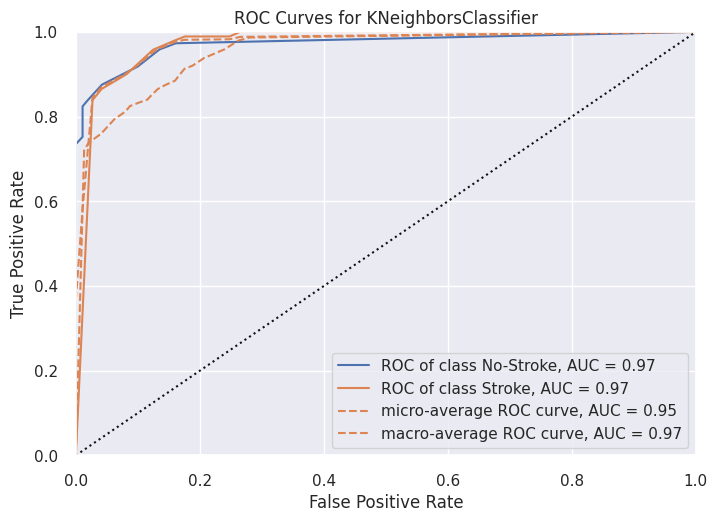

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [188]:
visualizer_ROCAUC = ROCAUC(knn, classes=["No-Stroke", "Stroke"])

visualizer_ROCAUC.fit(X_train, y_train)
visualizer_ROCAUC.score(X_test, y_test)
visualizer_ROCAUC.show()

**Support Vector Machine (SVM)**

In [189]:
# fitting data to model

svm = SVC()
svm.fit(X_train, y_train)

# model predictions

svm_y_pred = svm.predict(X_test)

In [190]:
# accuracy score

print("SVM Train Accuracy: ", accuracy_score(y_train, svm.predict(X_train)))

svm_acc = accuracy_score(y_test, svm_y_pred)
print("SVM Test Accuracy: ", svm_acc)

SVM Train Accuracy:  0.8942103667778114
SVM Test Accuracy:  0.88


In [191]:
# classification report

print(classification_report(y_test, svm_y_pred, zero_division= 0 ))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       819
           1       0.84      0.94      0.89       831

    accuracy                           0.88      1650
   macro avg       0.89      0.88      0.88      1650
weighted avg       0.89      0.88      0.88      1650



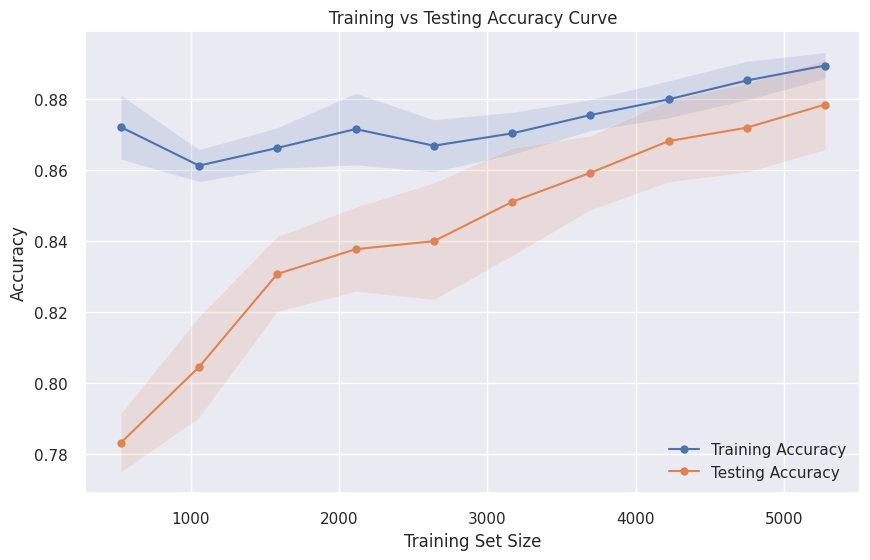

In [192]:
from sklearn.model_selection import learning_curve
svm.fit(X_train, y_train)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(svm, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Training vs Testing Accuracy Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

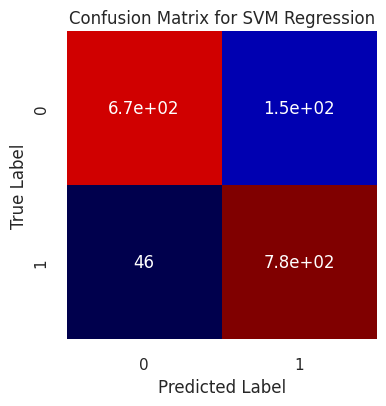

In [193]:
svm_acc = accuracy_score(y_test, svm_y_pred)
svm_roc = roc_auc_score(y_test, svm_y_pred)
svm_prec = precision_score(y_test, svm_y_pred)
svm_rec = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

# confusion matrix

confusion_svm = confusion_matrix(y_test, svm_y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_svm, annot=True, cmap='seismic', cbar=False)
plt.title('Confusion Matrix for SVM Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [194]:
tn, fp, fn, tp = confusion_matrix(y_test, svm_y_pred).ravel()

# Calculate sensitivity
svm_sensitivity = tp / (tp + fn)

# Calculate specificity
svm_specificity = tn / (tn + fp)

print("Sensitivity:", svm_sensitivity)
print("Specificity:", svm_specificity)

Sensitivity: 0.9446450060168472
Specificity: 0.8144078144078144


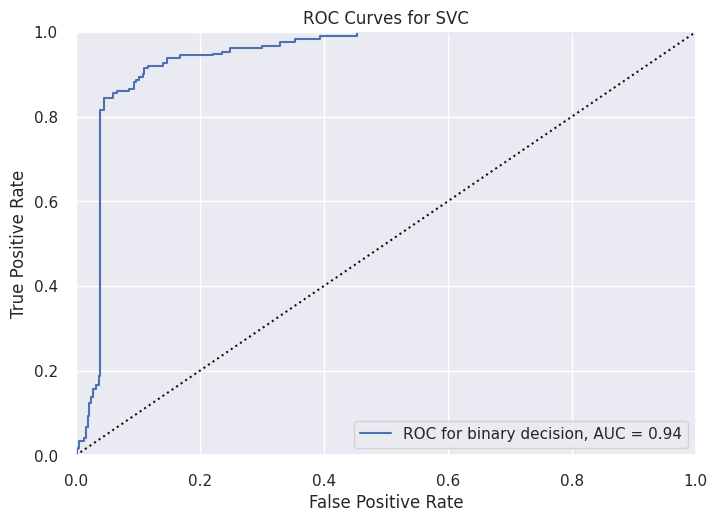

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [195]:
visualizer_ROCAUC = ROCAUC(svm, classes=["No-Stroke", "Stroke"], binary=True)

visualizer_ROCAUC.fit(X_train, y_train)
visualizer_ROCAUC.score(X_test, y_test)
visualizer_ROCAUC.show()

**Decision Tree Classifier**

In [196]:
# fitting data to model

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# model predictions

dt_y_pred = dt.predict(X_test)

In [197]:
# accuracy score

print("Decision Tree Train Accuracy: ", accuracy_score(y_train, dt.predict(X_train)))

dt_acc = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Test Accuracy: ", dt_acc)

Decision Tree Train Accuracy:  1.0
Decision Tree Test Accuracy:  0.9878787878787879


In [198]:
# classification report

print(classification_report(y_test, dt_y_pred, zero_division= 0 ))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       819
           1       0.98      1.00      0.99       831

    accuracy                           0.99      1650
   macro avg       0.99      0.99      0.99      1650
weighted avg       0.99      0.99      0.99      1650



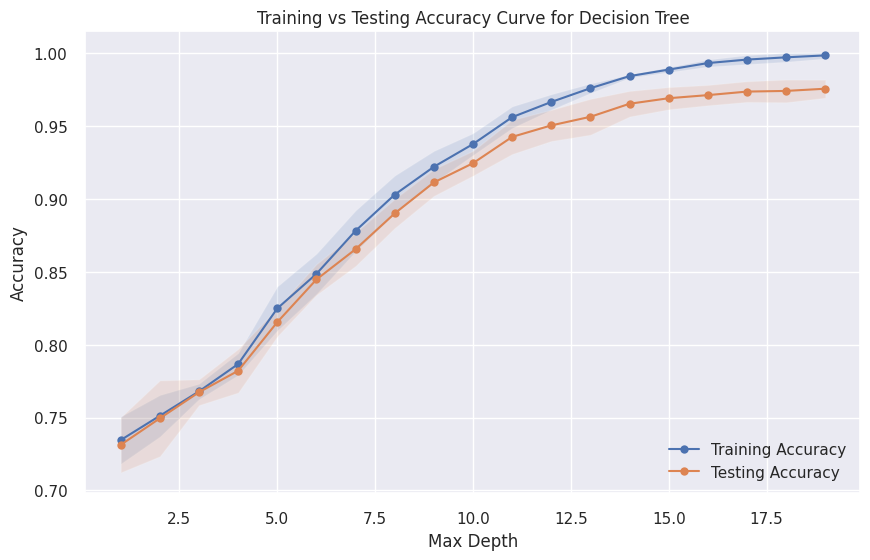

In [199]:
# Define a range of tree depths to explore
param_range = np.arange(1, 20)

# Calculate training and testing scores for different tree depths
train_scores, test_scores = validation_curve(DecisionTreeClassifier(criterion='entropy'), X_train, y_train, param_name='max_depth', param_range=param_range, cv=5, scoring='accuracy')

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(param_range, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Training vs Testing Accuracy Curve for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

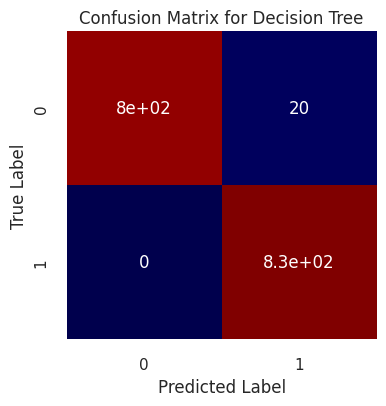

In [200]:
dt_acc = accuracy_score(y_test, dt_y_pred)
dt_roc = roc_auc_score(y_test, dt_y_pred)
dt_prec = precision_score(y_test, dt_y_pred)
dt_rec = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)

# confusion matrix

confusion_dt = confusion_matrix(y_test, dt_y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_dt, annot=True, cmap='seismic', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [201]:
tn, fp, fn, tp = confusion_matrix(y_test, dt_y_pred).ravel()

# Calculate sensitivity
dt_sensitivity = tp / (tp + fn)

# Calculate specificity
dt_specificity = tn / (tn + fp)

print("Sensitivity:", dt_sensitivity)
print("Specificity:", dt_specificity)

Sensitivity: 1.0
Specificity: 0.9755799755799756


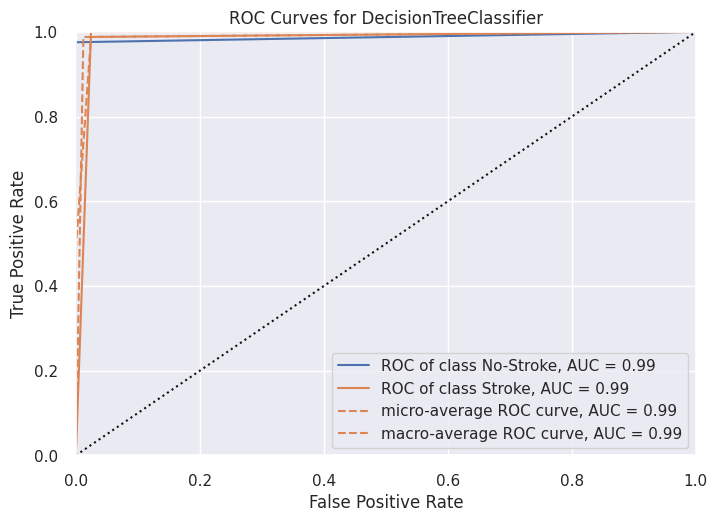

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [202]:
visualizer_ROCAUC = ROCAUC(dt, classes=["No-Stroke", "Stroke"])

visualizer_ROCAUC.fit(X_train, y_train)
visualizer_ROCAUC.score(X_test, y_test)
visualizer_ROCAUC.show()

**Naive Bayes classifier**

In [203]:
# fitting data to model

gNB = GaussianNB()
gNB.fit(X_train, y_train)

# model predictions

gNB_y_pred = gNB.predict(X_test)

In [204]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Gaussian Naive Bayes Train Accuracy: ", accuracy_score(y_train, gNB.predict(X_train)))

gNB_acc = accuracy_score(y_test, gNB_y_pred)
print("Gaussian Naive Bayes Test Accuracy: ", gNB_acc)

Gaussian Naive Bayes Train Accuracy:  0.5783570779023947
Gaussian Naive Bayes Test Accuracy:  0.5806060606060606


In [205]:
# classification report

print(classification_report(y_test, gNB_y_pred, zero_division= 0 ))

              precision    recall  f1-score   support

           0       0.95      0.16      0.28       819
           1       0.55      0.99      0.70       831

    accuracy                           0.58      1650
   macro avg       0.75      0.58      0.49      1650
weighted avg       0.75      0.58      0.49      1650



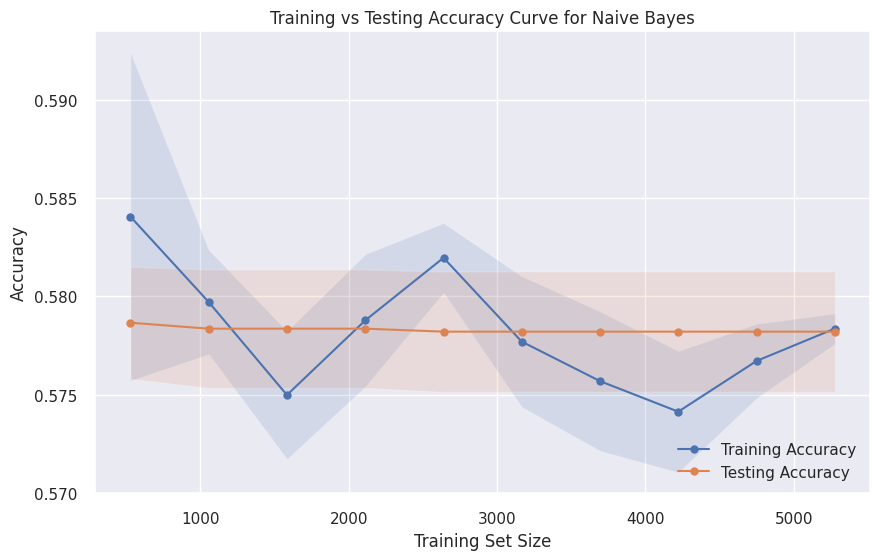

In [206]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(), X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Training vs Testing Accuracy Curve for Naive Bayes')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Text(11.388888888888891, 0.5, 'True Label')

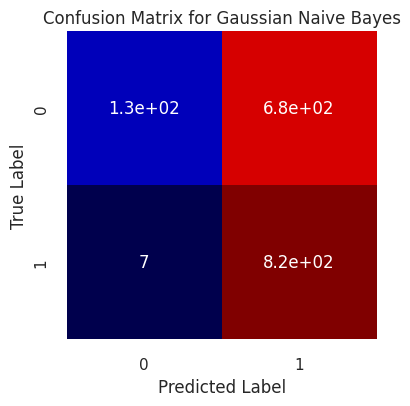

In [207]:
gNB_acc = accuracy_score(y_test, gNB_y_pred)
gNB_roc = roc_auc_score(y_test, gNB_y_pred)
gNB_prec = precision_score(y_test, gNB_y_pred)
gNB_rec = recall_score(y_test, gNB_y_pred)
gNB_f1 = f1_score(y_test, gNB_y_pred)

# confusion matrix

confusion_gNB = confusion_matrix(y_test, gNB_y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_gNB, annot=True, cmap='seismic', cbar=False)
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [208]:
tn, fp, fn, tp = confusion_matrix(y_test, gNB_y_pred).ravel()

# Calculate sensitivity
gNB_sensitivity = tp / (tp + fn)

# Calculate specificity
gNB_specificity = tn / (tn + fp)

print("Sensitivity:", gNB_sensitivity)
print("Specificity:", gNB_specificity)

Sensitivity: 0.9915764139590855
Specificity: 0.16361416361416362


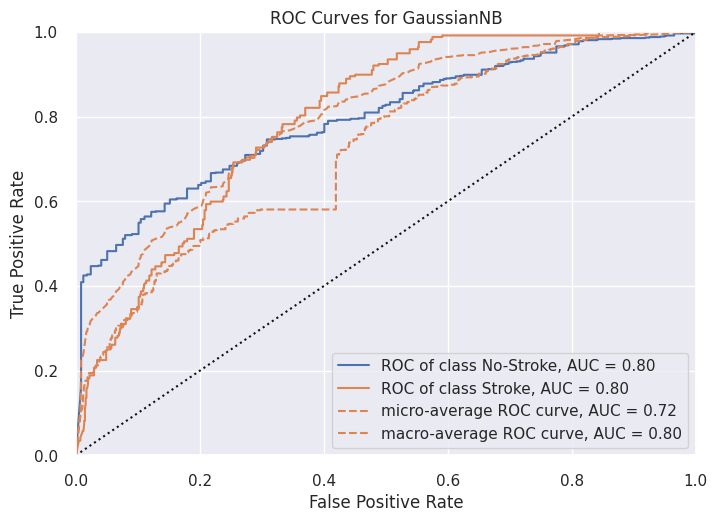

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [209]:
visualizer_ROCAUC = ROCAUC(gNB, classes=["No-Stroke", "Stroke"])

visualizer_ROCAUC.fit(X_train, y_train)
visualizer_ROCAUC.score(X_test, y_test)
visualizer_ROCAUC.show()

**Random Forest**

In [210]:
# fitting data to model

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# model predictions

rf_y_pred = rf.predict(X_test)

In [211]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Random Forest Train Accuracy: ", accuracy_score(y_train, rf.predict(X_train)))

rf_acc = accuracy_score(y_test, rf_y_pred)
print("Random Forest Test Accuracy: ", rf_acc)

Random Forest Train Accuracy:  1.0
Random Forest Test Accuracy:  0.9987878787878788


In [212]:
# classification report

print(classification_report(y_test, rf_y_pred, zero_division= 0 ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       819
           1       1.00      1.00      1.00       831

    accuracy                           1.00      1650
   macro avg       1.00      1.00      1.00      1650
weighted avg       1.00      1.00      1.00      1650



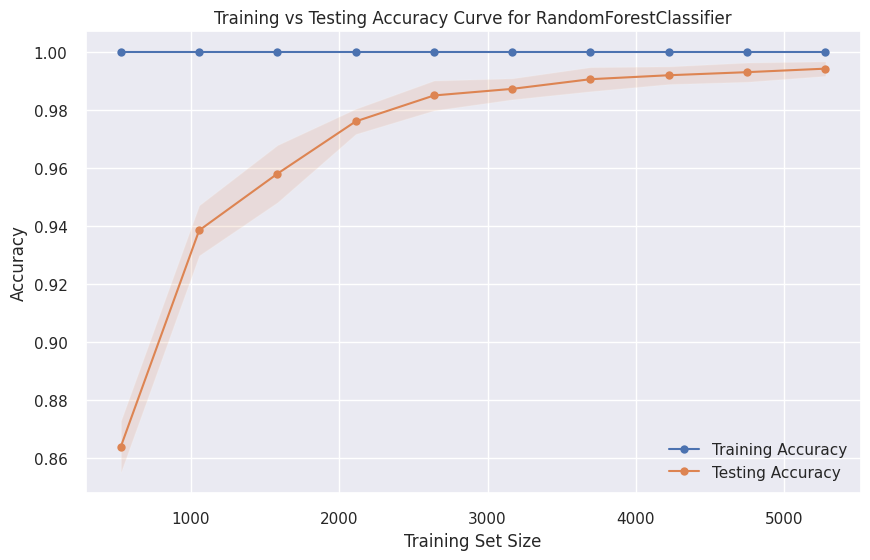

In [213]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Training vs Testing Accuracy Curve for RandomForestClassifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Text(0.5, 5.388888888888884, 'Predicted Label')

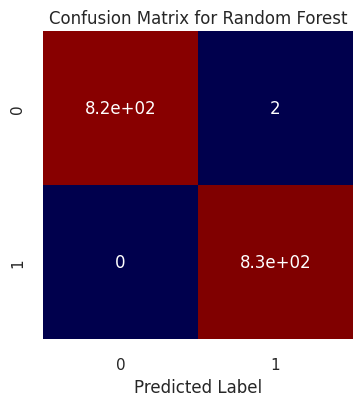

In [214]:
rf_acc = accuracy_score(y_test, rf_y_pred)
rf_roc = roc_auc_score(y_test, rf_y_pred)
rf_prec = precision_score(y_test, rf_y_pred)
rf_rec = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

# confusion matrix
confusion_rf = confusion_matrix(y_test, rf_y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_rf, annot=True, cmap='seismic', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')

In [215]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_y_pred).ravel()

# Calculate sensitivity
rf_sensitivity = tp / (tp + fn)

# Calculate specificity
rf_specificity = tn / (tn + fp)

print("Sensitivity:", rf_sensitivity)
print("Specificity:", rf_specificity)

Sensitivity: 1.0
Specificity: 0.9975579975579976


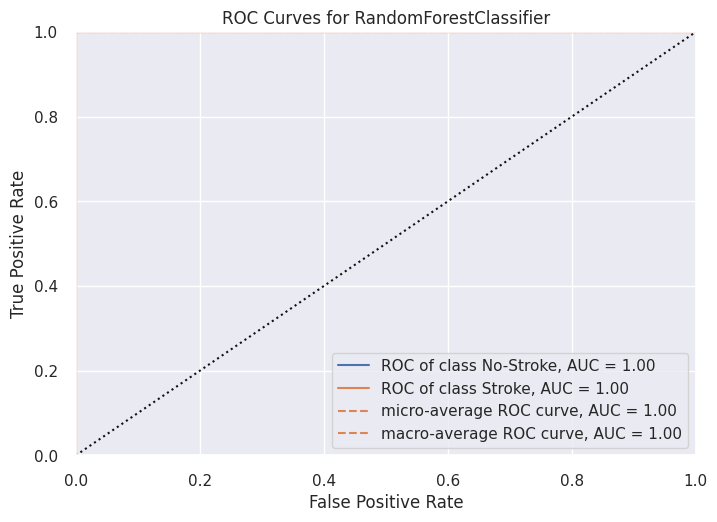

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [216]:
visualizer_ROCAUC = ROCAUC(rf, classes=["No-Stroke", "Stroke"])

visualizer_ROCAUC.fit(X_train, y_train)
visualizer_ROCAUC.score(X_test, y_test)
visualizer_ROCAUC.show()

In [217]:
#creating a table for comparing evaluation metrics
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Gaussian Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score': [log_Reg_acc, knn_acc, svm_acc, gNB_acc, dt_acc, rf_acc, ],
    'Sensitivity' : [log_Reg_sensitivity, knn_sensitivity, svm_sensitivity, gNB_sensitivity, dt_sensitivity, rf_sensitivity],
    'Specificity' : [log_Reg_specificity, knn_specificity, svm_specificity, gNB_specificity, dt_specificity, rf_specificity],
    'Precision':[log_Reg_rec, knn_rec, svm_rec, gNB_rec, dt_rec, rf_rec],
    'Recall':[log_Reg_prec, knn_prec, svm_prec, gNB_prec, dt_prec, rf_prec],
    'F1 Score':[log_Reg_f1, knn_f1, svm_f1, gNB_f1, dt_f1, rf_f1],
    'ROC':[log_Reg_roc, knn_roc, svm_roc, gNB_roc, dt_roc, rf_roc]
})

result = models.sort_values(by = 'Score', ascending = False)
result

,Model,Score,Sensitivity,Specificity,Precision,Recall,F1 Score,ROC
5,Random Forest Classifier,0.998788,1.000000,0.997558,1.000000,0.997599,0.998798,0.998779
4,Decision Tree Classifier,0.987879,1.000000,0.975580,1.000000,0.976498,0.988109,0.987790
1,KNN,0.950303,1.000000,0.899878,1.000000,0.910186,0.952982,0.949939
2,SVM,0.880000,0.944645,0.814408,0.944645,0.837780,0.888009,0.879526
0,Logistic Regression,0.764242,0.793020,0.735043,0.793020,0.752283,0.772115,0.764032
3,Gaussian Naive Bayes,0.580606,0.991576,0.163614,0.991576,0.546057,0.704274,0.577595


In [218]:
# Create a dictionary to store confusion matrices
confusion_matrix_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Gaussian Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'True Positives (TP)': [confusion_log[1][1], confusion_knn[1][1], confusion_svm[1][1], confusion_gNB[1][1], confusion_dt[1][1], confusion_rf[1][1]],
    'True Negatives (TN)': [confusion_log[0][0], confusion_knn[0][0], confusion_svm[0][0], confusion_gNB[0][0], confusion_dt[0][0], confusion_rf[0][0]],
    'False Positives (FP)': [confusion_log[0][1], confusion_knn[0][1], confusion_svm[0][1], confusion_gNB[0][1], confusion_dt[0][1], confusion_rf[0][1]],
    'False Negatives (FN)': [confusion_log[1][0], confusion_knn[1][0], confusion_svm[1][0], confusion_gNB[1][0], confusion_dt[1][0], confusion_rf[1][0]]
})

confusion_matrix_df

,Model,True Positives (TP),True Negatives (TN),False Positives (FP),False Negatives (FN)
0,Logistic Regression,659,602,217,172
1,KNN,831,737,82,0
2,SVM,785,667,152,46
3,Gaussian Naive Bayes,824,134,685,7
4,Decision Tree Classifier,831,799,20,0
5,Random Forest Classifier,831,817,2,0


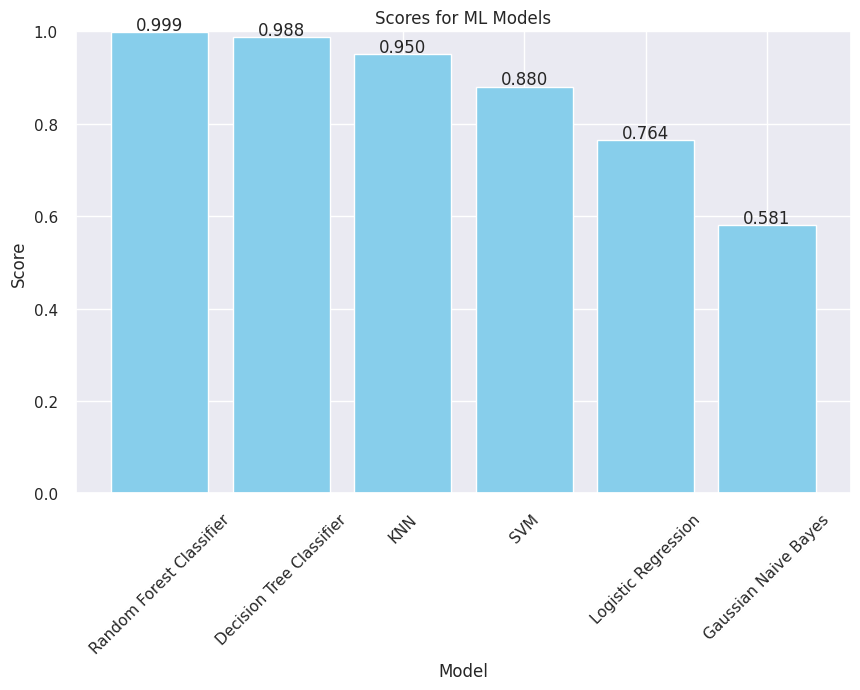

In [219]:
# Plot the scores for ML models
plt.figure(figsize=(10, 6))
plt.bar(result['Model'], result['Score'], color='skyblue')

# Add values on top of the bars
for i, score in enumerate(result['Score']):
    plt.text(i, score + 0.005, f'{score:.3f}', ha='center')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Scores for ML Models')

# Show plot
plt.ylim(0, 1)  # Set y-axis limit
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


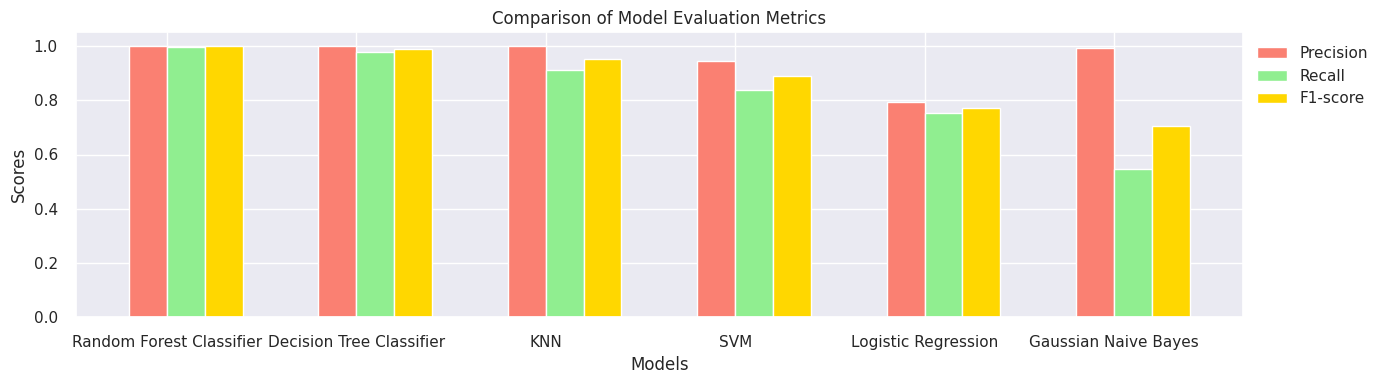

In [220]:
#Plotting the evaluation metrics for the model
plt.figure(figsize=(14, 4))
x = np.arange(len(result['Model']))

bar_width = 0.2
plt.bar(x + bar_width, result['Precision'], width=bar_width, label='Precision', color='salmon', align='center')
plt.bar(x + 2 * bar_width, result['Recall'], width=bar_width, label='Recall', color='lightgreen', align='center')
plt.bar(x + 3 * bar_width, result['F1 Score'], width=bar_width, label='F1-score', color='gold', align='center')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Evaluation Metrics')
plt.xticks(x + 1.5 * bar_width, result['Model'])
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()